# [Atractor de lorentz](https://en.wikipedia.org/wiki/Lorenz_system)



Dada el siguiente sistema de ecuaciones, asociadas a un modelo simplificado de la atomosfera, encontrar los valores de x, y, z.

\begin{equation}
\frac{\mathrm{d}x}{\mathrm{d}t} = \sigma (y-x)
\end{equation}


\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} = x(\rho-z)-y
\end{equation}

\begin{equation}
\frac{\mathrm{d}z}{\mathrm{d}t} = xy-\beta z
\end{equation}

El modelo anteror permite describir de un a manera simplificada el movimiento atmosférico de masas de aire, los valores x, y, z se corresponden a posiciones de un volumen que contiene  una masa de aire, y los párametros $\sigma$, $\beta$ y  $\rho$ hacen referencia a, las siguientes cantidades fisicas:

\begin{equation}
\sigma = \frac{\mathrm{viscosidad}}{\mathrm{conductividad\ térmica }},
\end{equation}

$\rho$ hace refencia al término de convección entre el suelo y el techo del volumen discretizado.

\begin{equation}
\rho =\frac{g\beta}{v \alpha} (T_s-T_{\infty})L^3
\end{equation}

y $\beta=\frac{\mathrm{Ancho\ del\ cubo}}{\mathrm{Altura\ de\ la\ caja}}$ es un termino geométrico.


<!-- Tiene puntos de equilibrio en 
- $(x, y, z)=(0,0,0)$
- $(\pm \sqrt{\beta(\rho-1}),\pm \sqrt{\beta(\rho-1}),\rho-1)$

El sistema de ecuaciones anterior puede ser escrito como:
\begin{equation}
\begin{pmatrix}
-\sigma & \sigma & 0\\
\rho-z & -1 & 0\\
y & 0 & -\beta
\end{pmatrix}
\end{equation} -->



Emplee la integración: [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html), realice la integración del sistema de ecuaciones diferenciales

1. Importe las librerias odeint, numpy, matplotlib

2. Defina una función con el sistema de ecuaciones a integrar, para ello construya el siguiente el sistema de ecuaciones en una función:


Puede ser escrito como: 

\begin{equation}
\begin{bmatrix}
\frac{\mathrm{d}U_0}{\mathrm{d}t}\\
\frac{\mathrm{d}U_1}{\mathrm{d}t}\\
\frac{\mathrm{d}U_2}{\mathrm{d}t}
\end{bmatrix}=
\begin{bmatrix}
\sigma (U_1-U_0)\\
U_0(\rho-U_2)-U_1\\
U_0U_1-\beta U_2\\
\end{bmatrix}
\end{equation}


3. Solucione el sistema de ecuaciones para los siguientes parametros y  realice un gráfico en 3D de la solución, empleando el código de mas abajo.

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 10$  con condiciones iniciales,  $x_0,y_0,z_0 = [1,1,1]$

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 10$  con condiciones iniciales,  $x_0,y_0,z_0 = [1.5,1,5,1.5]$


- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1,1,1]$

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1.001,1.001,1.001]$

```
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(x,y,z)
plt.draw()
plt.show()
```

5. ¿Como puede estar seguro de que la solucion es la esperada?

### Solución 

In [1]:
# Importamos las librerias
import numpy as np 
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Vamos a escribir la función que nos determina las ecuaciones en forma matricial: 

In [2]:
def dU_dt(U,t,σ,ρ,β):
    return [σ*(U[1] - U[0]),
            U[0]*(ρ-U[2]) - U[1],
            U[0]*U[1] - β*U[2]]

Ahora resolvamos el sistema para los parametros dados y grafiquemos en 3D: 

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 10$  con condiciones iniciales,  $x_0,y_0,z_0 = [1,1,1]$

Text(0.5, 0, 'Z')

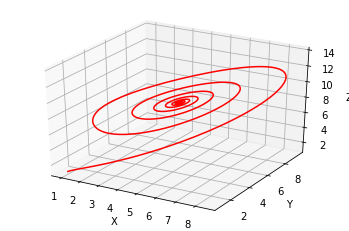

In [3]:
σ = 10.0
β = 8./3
ρ = 10
U_0 = [1,1,1]
points = np.linspace(0,10,1000)
solve = odeint(dU_dt, U_0 , points, args = (σ,ρ,β))
x,y,z = solve[:,0],solve[:,1],solve[:,2]


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot(x, y, z, color="r")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 10$  con condiciones iniciales,  $x_0,y_0,z_0 = [1.5,1,5,1.5]$


Text(0.5, 0, 'Z')

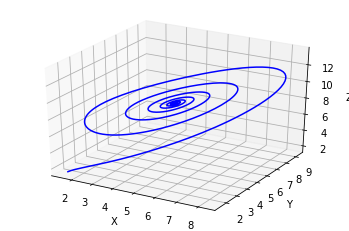

In [4]:
σ = 10.0
β = 8./3
ρ = 10
U_0 = [1.5,1.5,1.5]
points = np.linspace(0,10,1000)
solve = odeint(dU_dt, U_0 , points, args = (σ,ρ,β))
x1,y1,z1 = solve[:,0],solve[:,1],solve[:,2]


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot(x1, y1, z1, color="b")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

Para mostrar la divergencia entre los dos casos anteriores, es decir, el cambió que hay solo al variar un poco las condiciones iniciales los vamos a gráficar juntos: 

Text(0.5, 0, 'Z')

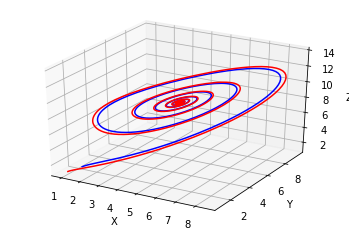

In [5]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot(x1, y1, z1, color="b")
surf = ax.plot(x, y, z, color="r")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1,1,1]$


Text(0.5, 0, 'Z')

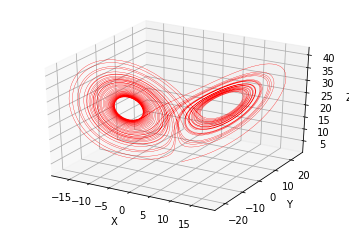

In [6]:
σ = 10.0
β = 8./3
ρ = 25
U_0 = [1,1,1]
points = np.linspace(0,50,10000)
solve = odeint(dU_dt, U_0 , points, args = (σ,ρ,β))
x,y,z = solve[:,0],solve[:,1],solve[:,2]


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot(x, y, z, color="r", linewidth=0.3)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1.001,1.001,1.001]$


Text(0.5, 0, 'Z')

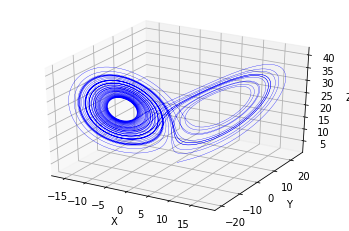

In [7]:
σ = 10.0
β = 8./3
ρ = 25
U_0 = [1.001,1.001,1.001]
points = np.linspace(0,50,10000)
solve = odeint(dU_dt, U_0 , points, args = (σ,ρ,β))
x1,y1,z1 = solve[:,0],solve[:,1],solve[:,2]

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot(x1, y1, z1, color="b", linewidth=0.3)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

Hacemos lo mismo para este caso, mostramos juntas ambas gráficas: 

Text(0.5, 0, 'Z')

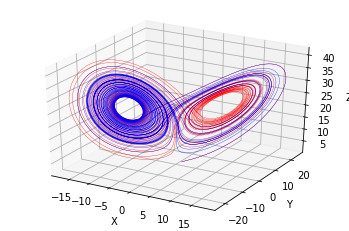

In [8]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot(x, y, z, color="r", linewidth=0.3)
surf = ax.plot(x1, y1, z1, color="b", linewidth=0.3)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Taller: Oscilaciones Acopladas

Considere dos osciladores acoplados, de masas idénticas y  conectadas mediante tres resortes de constantes elásticas $k_1, k_2, k_3$. Como se muestra en la figura.





Después de realizar un análisis detallado del problema, a través de las leyes de Newton ó empleando las ecuaciones de Euler-Lagrange, se puede mostrar que las ecuaciones de movimiento para el sistema vienen dadas por: 

\begin{equation}
m_1 \frac{ \mathrm{d}^2 x_1 }{\mathrm{d}t^2} = -k_1 x_1 + k_2 (x_2-x_1)
\end{equation}



\begin{equation}
m_2 \frac{ \mathrm{d}^2 x_2 }{\mathrm{d}t^2} = -k_3 x_2 - k_2 (x_2-x_1)
\end{equation}

De forma compacta,  la ecuacion anterior puede ser escrita como: 


\begin{equation}
m_1 \ddot{x_1} = -k_1 x_1 + k_2 (x_2-x_1)
\end{equation}



\begin{equation}
m_2  \ddot{x_2} = -k_3 x_2 - k_2 (x_2-x_1)
\end{equation}

donde $\ddot{x} =\frac{\mathrm{d^2}x}{\mathrm{d}t^2}$.

Las ecuaciones anteriores, son ecuaciones diferenciales lineales de segundo orden y acopladas, que pueden ser escritas de forma matricial como $m\vec{\ddot{x}}= -A\vec{x}$, donde A, es una matriz simétrica: 

\begin{equation}
m
\begin{pmatrix} 
\ddot{x_1}  \\
\ddot{x_2}    
\end{pmatrix}
=-
\begin{pmatrix} 
k_1 + k_2 & -k_2  \\
-k_2       &  k_2+k_3  \\
\end{pmatrix}
\begin{pmatrix} 
x_1\\
x_2
\end{pmatrix}
\end{equation}


Para resolver el sistema de ecuaciones acopladas, se puede realizar una transformación, que permite desacoplar el sistema de ecuaciones diferenciales. Sea
 $\vec{\eta}=S\vec{x}$, donde $\eta$ es una nueva variable en el sistema transformado y S una matriz que cumple que $SAS^{-1}=A_d$, siendo $A_d$ una matriz diagonal. 
 
 Se cumple que $\vec{\ddot {\eta}}=S\vec{\ddot{x}}$ 
 y  $m\vec{\ddot{x}}=A\vec{x}$, multiplicando por una matriz S, a ambos lados de la ecuación $m\vec{\ddot{x}}=-A\vec{x}$ obtenemos: 

\begin{equation}
mS\vec{\ddot{x}}=- S A\vec{x}
\end{equation}

\begin{equation}
m \vec{\ddot{\eta}} = -S A S^{-1}S\vec{x}
\end{equation}


\begin{equation}
m \vec{\ddot{\eta}} = -(S A S^{-1})\eta
\end{equation}


\begin{equation}
m \vec{\ddot{\eta}} = -A_d\eta
\end{equation}

\begin{equation}
m\begin{pmatrix} 
\ddot{\eta_1}\\
\ddot{\eta_2}
\end{pmatrix}
=
-\begin{pmatrix} 
\lambda_1 & 0\\
0          &\lambda_2
\end{pmatrix}
\begin{pmatrix} 
\eta_1\\
\eta_2
\end{pmatrix},
\end{equation}

donde $\lambda=m\omega^2$ son los autovalores de A. Notese que S es la matriz formada por los autovectores de A. La ecuacion anterior, tiene solución en términos de funciones armónicas.


Basado en lo anterior, y resolviendo  el problema más sencillo en el que $k_1 = k_3 = k$, tenemos que:


\begin{equation}
\begin{pmatrix} 
\frac{k + k_2}{m}-\omega^2 & -\frac{k_2}{m}\\
 -\frac{k_2}{m}          &\frac{k_2 + k}{m}-\omega^2
\end{pmatrix}
\begin{pmatrix} 
x_1\\
x_2
\end{pmatrix}
=
-\begin{pmatrix} 
0\\
0
\end{pmatrix}
\end{equation}


\begin{equation}
det(A-\omega^2 I)= \left(\frac{k + k_2}{m}-\omega^2\right) \left(\frac{k_2+k}{m}-\omega^2\right )-\frac{k_2^2}{m^2}=0
\end{equation}

Resolviendo para $\omega^2$, tenemos que : 

\begin{equation}
\omega^2_1=\frac{k+2k_2}{m}
\end{equation}


\begin{equation}
\omega^2_2=\frac{k}{m}, 
\end{equation}


los autovecres vienen dados por: 

\begin{equation}
\vec{v_1}=\frac{1}{\sqrt{2}}
\begin{pmatrix}
1\\
-1
\end{pmatrix}
\end{equation}


\begin{equation}
\vec{v_2}=\frac{1}{\sqrt{2}}
\begin{pmatrix}
1\\
1
\end{pmatrix}
\end{equation}

y la matriz S, viene dada por: 


\begin{equation}
S=\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & -1\\
1 & 1
\end{pmatrix}
\end{equation}

las variables $x_1,x_2$, en terminos de $\eta$ están dadas por: 

 \begin{equation}
x_1=\frac{1}{\sqrt{2}}(\eta_1+\eta_2)
\end{equation}


\begin{equation}
x_2=\frac{1}{\sqrt{2}}(\eta_2+\eta_1)
\end{equation}

En conclusión el problema puede ser resuelto, si solucionamos la 
ecuaciones diferenciables desacopladas: 
\begin{equation}
\ddot{\eta_1}+\omega_1\eta_1=0
\end{equation}

\begin{equation}
\ddot{\eta_2}+\omega_2\eta_2=0
\end{equation}

 con: 
 
 \begin{equation}
\omega^2_1=\frac{k+2k_2}{m}
\end{equation}


\begin{equation}
\omega^2_2=\frac{k}{m}
\end{equation}

# Su tarea será:

1. Considerar un sistema de dos osciladores acoplados, con constantes elásticas $k_1=k_3$,  $k_2$ y construir un programa que permita realizar los cálculos anteriores de forma sistemática. Es decir, se deberá resolver el problema de autovalores y autovectores, para encontrar las frecuencias de oscilación y la matriz diagonal. La ecuación diferencial  para $\eta$,  deberá ser resuelta  numéricamente y comparada con la solución análitica, la cual viene dada por: 


\begin{equation}
\eta_1(t)=\eta_1(0)\cos(\omega_1t)+ \frac{\dot{\eta_1}(0)}{\omega_1}\sin(\omega_1t)
\end{equation}

\begin{equation}
\eta_2(t)=\eta_2(0)\cos(\omega_2t)+ \frac{\dot{\eta_2}(0)}{\omega_2}\sin(\omega_1t)
\end{equation}

y empleando: 

\begin{equation}
x_1=\frac{1}{\sqrt{2}}(\eta_1+\eta_2)
\end{equation}


\begin{equation}
x_2=\frac{1}{\sqrt{2}}(\eta_2+\eta_1)
\end{equation}
tenemos que la solución exacta, al problema viene dada por: 

\begin{equation}
x_1(t)=\frac{1}{2}(x_1(0)-x_2(0))\cos\omega_1 t+\frac{1}{2\omega_1}(\dot{x_1}(0)-\dot{x_2}(0))\sin\omega_1t+\\
\frac{1}{2}(x_1(0)+x_2(0))\cos\omega_2 t+\frac{1}{2\omega_2}(\dot{x_1}(0)+\dot{x_2}(0))\sin\omega_2t
\end{equation}

\begin{equation}
x_2(t)=\frac{1}{2}(x_2(0)-x_1(0))\cos\omega_1 t+\frac{1}{2\omega_1}(\dot{x_2}(0)-\dot{x_1}(0))\sin\omega_1t+\\
\frac{1}{2}(x_1(0)+x_2(0))\cos\omega_2 t+\frac{1}{2\omega_2}(\dot{x_1}(0)+\dot{x_2}(0))\sin\omega_2t
\end{equation}


La ecuacion anterior tiene solución según las condiciones iniciales. Muestre que la solucion numérica coincide con la analíítica, para ello, realice graficas de ambas soluciones y comparelas, cuando considera  la evolución temporal de $x_1$, $x_2$ para las siguientes condiciones:

- **Modo simétrico:** $x_1(0) = x_2(0) = A$, $\dot{x_1}(0)=\dot{x_2}(0) = 0$ 
- **Modo antisimétrico:** $x_1(0)=-x_2(0) = A$, $\dot{x_1}(0)=\dot{x_2}(0) = 0$ 
-  $x_1(0)=A, x_2(0) = 0$, $\dot{x_1}(0)=\dot{x_2}(0) = 0$ 



2. Para el última condición, suponga que el acoplamiento es debil, es decir $k_2<<k$. ¿Cómo es la evolucion temporal de $x_1$ y $x_2$ en este caso?.

3. ¿Qué puede concluir de sus resultados?

4.  Generalizar el problema, para constantes elásticas de los resortes $k_1, k_2, k_3$ y masas de $m_1, m_2, m_3$.

5. Realice una animación del movimiento de las particulas en el espacio, segun los resultados obtenidos.






In [9]:
# Importamos las librerias a utilizar 
import numpy as np
from matplotlib import pyplot as plt
from sympy import Matrix as M
from scipy import integrate

Primero vamos a crear una función con el sistema de ecuaciones iniciales

In [10]:
def U(k1,k2,k3,m): 
    return -(1/m) * np.array([
        [k1+k2,-k2],
        [-k2, k2+k3],
    ])

Observemos que la matriz U anterior es una matriz simétrica, por tanto podemos usar el método tradicional linalg.eig para encontrar sus autovalores y autovectores. Vamos a crear una función para solucionar esto. 

Recordemos que como el sistema está desacoplado podemos solucionar cada ecuación en términos de $\eta$ de manera independiente como :

\begin{equation}
v = \frac{d \eta}{dt} 
\end{equation}

\begin{equation} U=
\begin{bmatrix}
U_{0}\\
U_{1}
\end{bmatrix} = 
\begin{bmatrix}
\eta\\
v
\end{bmatrix} 
\end{equation}


\begin{equation} \frac{dU}{dt}=
\begin{bmatrix}
U_{1}\\
\lambda U_{0}
\end{bmatrix} 
\end{equation}

Nota: El signo menos y la masa ya están incluidos en la ecuación de U definida en la función.



In [17]:
def solve_edo(U,t, X0, V0):
    
    λ,V=np.linalg.eig(U)
    
    S = np.c_[V[0],V[1]] # matriz de autovectores
    
    Adiag = np.diag([λ[0],λ[1]]) # creamos la matriz de autovalores,  Adiag

    # Debemos obtener ahora las condiciones iniciales en terminos de ŋ1 y ŋ2, para esto multiplicamos S por x0 y v0. 
    
    ŋ0 = S@X0
    dŋ0 = S@V0
    
    # dividimos las condiciones iniciales para cada una de las masas
    ŋ0_1 = [ŋ0[0],dŋ0[0]]
    ŋ0_2 = [ŋ0[1],dŋ0[1]]
    
    # Ahora solucionamos la ecuación diferencial con el método Ode int de scipy 
    
    def dU_dt(U,t,λ):
        return [ U[1],
                λ * U[0]]
    
    ŋ1 = integrate.odeint(dU_dt,ŋ0_1,t, args = (λ[0],)) 
    ŋ2 = integrate.odeint(dU_dt,ŋ0_2,t, args= (λ[1],) )

    # Por ultimo debemos llevar de nuevo la solución a terminos de x1 y x2 
    
    ŋ = np.c_[ŋ1[:,0],ŋ2[:,0]].T
    x = np.linalg.inv(S) @ ŋ 
    
    x1 = x[0,:]
    x2 = x[1,:]
    
    return x1,x2


Ahora que tenemos la solución númerica podemos programar la solución analítica:

In [20]:
def analitica(k1,k2,k3, m, X0,V0,t): 

    ω1 = np.sqrt((k1+2*k2)/m)
    ω2 = np.sqrt(k1/m)

    def X_1(t,ω1,ω2,X_0,dx_0):

        term1 = 0.5 * (X_0[0] - X_0[1])* np.cos(ω1*t)   
        term2 = 1/(2*ω1) * (dx_0[0] - dx_0[1]) * np.sin(ω1*t)
        term3 =  0.5 * (X_0[0] + X_0[1])* np.cos(ω2*t)
        term4 = 1/(2*ω2) * (dx_0[0] + dx_0[1]) * np.sin(ω2*t)

        return term1+term2+term3+term4


    def X_2(t,ω1,ω2,X_0,dx_0):

        term1 = 0.5 * (X_0[1] - X_0[0])* np.cos(ω1*t)    
        term2 = 1/(2*ω1) * (dx_0[1] - dx_0[0]) * np.sin(ω1*t)
        term3 =  0.5* (X_0[0] + X_0[1])* np.cos(ω2*t)
        term4 = 1/(2*ω2) * (dx_0[0] + dx_0[1]) * np.sin(ω2*t)

        return term1 + term2 + term3 + term4
    
    x1 = X_1(t,ω1,ω2,X0,V0)
    x2 = X_2(t,ω1,ω2,X0,V0)
    
    return x1,x2

Ahora exploremos las condiciones iniciales: 

### Modo simétrico: 

In [42]:
X0 = [5,5]
V0 = [0,0]
t = np.linspace(0,20,100)

x1,x2 = solve_edo(U(1,10,1,1),t,X0,V0)
x1_analitica, x2_analitica = analitica(1,10,1, 1, X0,V0,t)

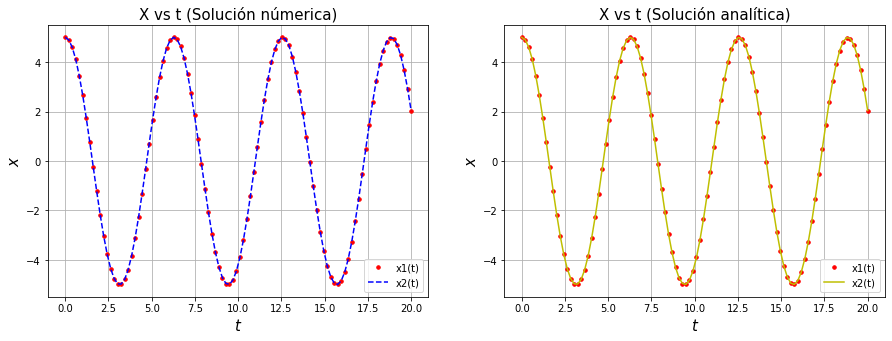

In [22]:
fig,axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(t,x1, 'ro', markersize=3.5, label = 'x1(t)')
axs[0].plot(t,x2, 'b--', label = 'x2(t)')
axs[0].set_xlabel('$t$', size=15, )
axs[0].set_ylabel('$x$', size=15)
axs[0].set_title('X vs t (Solución númerica)', size=15)
axs[0].legend()
axs[0].grid()

axs[1].plot(t,x1_analitica, 'ro', markersize=3.5, label = 'x1(t)')
axs[1].plot(t,x2_analitica, 'y-', label = 'x2(t)')
axs[1].set_xlabel('$t$', size=15, )
axs[1].set_ylabel('$x$', size=15)
axs[1].set_title('X vs t (Solución analítica)', size=15)
axs[1].legend()
axs[1].grid()

### Modo antisimétrico: 

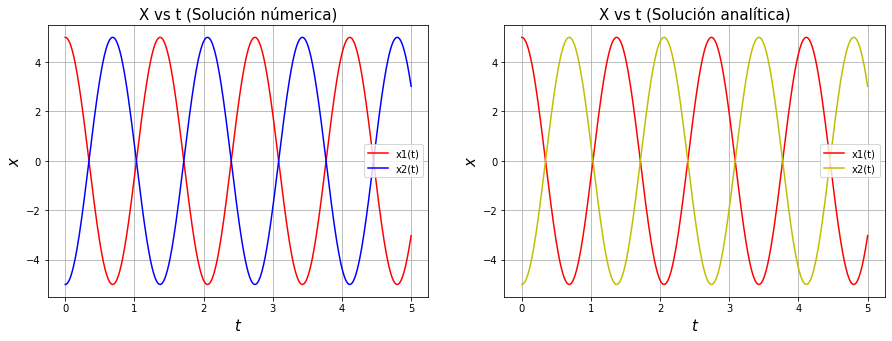

In [23]:
X0 = [5,-5]
V0 = [0,0]
t = np.linspace(0,5,1000)

x1,x2 = solve_edo(U(1,10,1,1),t,X0,V0)
x1_analitica, x2_analitica = analitica(1,10,1, 1, X0,V0,t)

fig,axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(t,x1, 'r', markersize=3.5, label = 'x1(t)')
axs[0].plot(t,x2, 'b', label = 'x2(t)')
axs[0].set_xlabel('$t$', size=15, )
axs[0].set_ylabel('$x$', size=15)
axs[0].set_title('X vs t (Solución númerica)', size=15)
axs[0].legend()
axs[0].grid()

axs[1].plot(t,x1_analitica, 'r', markersize=3.5, label = 'x1(t)')
axs[1].plot(t,x2_analitica, 'y', label = 'x2(t)')
axs[1].set_xlabel('$t$', size=15, )
axs[1].set_ylabel('$x$', size=15)
axs[1].set_title('X vs t (Solución analítica)', size=15)
axs[1].legend()
axs[1].grid()

### Modo antisimétrico 2 :  x1(0) = A, x2(0) = 0, V1(0) = V2(0) = 0 : 

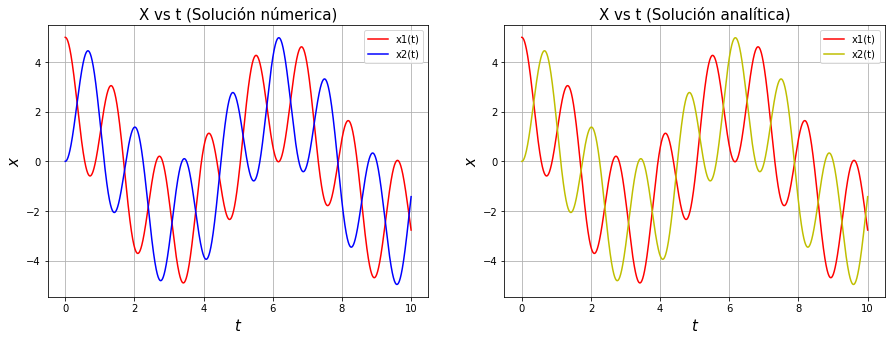

In [24]:
X0 = [5,0]
V0 = [0,0]
t = np.linspace(0,10,10000)

x1,x2 = solve_edo(U(1,10,1,1),t,X0,V0)
x1_analitica, x2_analitica = analitica(1,10,1, 1, X0,V0,t)

fig,axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(t,x1, 'r', markersize=3.5, label = 'x1(t)')
axs[0].plot(t,x2, 'b', label = 'x2(t)')
axs[0].set_xlabel('$t$', size=15, )
axs[0].set_ylabel('$x$', size=15)
axs[0].set_title('X vs t (Solución númerica)', size=15)
axs[0].legend()
axs[0].grid()

axs[1].plot(t,x1_analitica, 'r', markersize=3.5, label = 'x1(t)')
axs[1].plot(t,x2_analitica, 'y', label = 'x2(t)')
axs[1].set_xlabel('$t$', size=15, )
axs[1].set_ylabel('$x$', size=15)
axs[1].set_title('X vs t (Solución analítica)', size=15)
axs[1].legend()
axs[1].grid()

Ahora analicemos que pasa cuando k2 << k:

Este caso lo resolveremos usando el método númerico. 

### Acoplamiento debil:  k2 << k

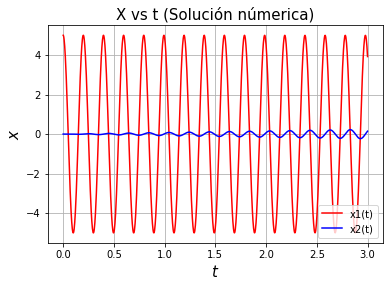

In [25]:
X0 = [5,0]
V0 = [0,0]
t = np.linspace(0,3,1000)

x1,x2 = solve_edo(U(1000,1,1000,1),t,X0,V0)

plt.plot(t,x1, 'r', markersize=3.5, label = 'x1(t)')
plt.plot(t,x2, 'b', label = 'x2(t)')
plt.xlabel('$t$', size=15, )
plt.ylabel('$x$', size=15)
plt.title('X vs t (Solución númerica)', size=15)
plt.legend()
plt.grid()


### Conclusión de los resultados: 

En este caso tenemos un sistema oscilatorio acoplado en donde cada masa oscila en torno a su propia posición de equilibrio.

Para el caso simétrico observamos que las masas oscilaran alrededor de cada uno de sus puntos de equilibrio con la misma amplitud y a la misma velocidad, es decir, oscilan en fase y los máximos y minimos de la posición respecto al tiempo coinciden en ambos casos. 

Para el primer caso antisimétrico observamos que en este caso cada masa oscila en contra fase alrededor de su propio punto de equilibrio. En este caso los mínimos de la masa 1 se corresponden con los máximos de la masa 2 y viceversa. 

Para el segundo caso antisimétrico, las dos masas también oscilan en contra fase pero se observa la particularidad que el punto de equilibrio respecto al cual oscila cada masa está en movimiento.

Por último para el caso del acoplamiento débil, se observa que una de las masas puede oscilar con mayor libertad y en toda la amplitud, sin embargo, la otra masa permanece casi en reposo, presentando oscilaciones de amplitudes muy pequeñas. 



# Animación 

Para hacer la animación se hará uso de matplotlib. El modulo especifico se llama animation. 

In [140]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def data_gen(t,x1,x2):
    for i in range(0,len(t)):
        yield t[i], x1[i], x2[i]

def init():
    ax.set_ylim(-6,6)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

def run(data):
    t, x1, x2 = data
    xdata.append(t)
    x1data.append(x1)
    x2data.append(x2)

    line1.set_data(xdata, x1data)
    line2.set_data(xdata, x2data)

    return line,


# Modo simétrico

Animación de la posición respecto al tiempo, 

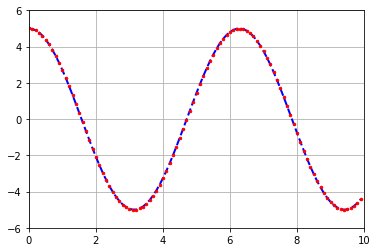

In [154]:
fig, ax = plt.subplots()
line1, = ax.plot([], [], '--b',lw=2)
line2, = ax.plot([], [], '.r' , markersize=5)
ax.grid()
xdata, x1data, x2data = [], [], []
 
X0 = [5,5]
V0 = [0,0]

t = np.linspace(0 , 100 , 1000)
x1,x2 = solve_edo(U(1,10,1,1),t,X0,V0)

ani = animation.FuncAnimation(fig, run, data_gen(t,x1,x2), interval=10,init_func=init)
HTML(ani.to_html5_video())

# Caso antisimétrico

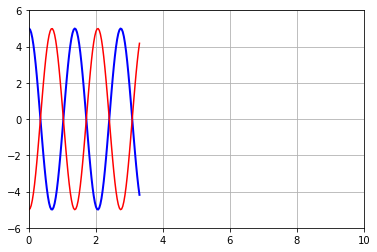

In [159]:
fig, ax = plt.subplots()
line1, = ax.plot([], [], 'b',lw=2)
line2, = ax.plot([], [], 'r' , markersize=5)
ax.grid()
xdata, x1data, x2data = [], [], []
 
X0 = [5,-5]
V0 = [0,0]

t = np.linspace(0 , 100 , 3000)
x1,x2 = solve_edo(U(1,10,1,1),t,X0,V0)

ani = animation.FuncAnimation(fig, run, data_gen(t,x1,x2), interval=30,init_func=init)
HTML(ani.to_html5_video())